Kien Truong
<br>
CPSC 483-02
<br>
Professor Avery
<br>
Due date: 4/9/2020
<br>
$$ Project #4 description $$
<br>
This project will use the California Housing dataset to examine features that affect the median values of homes and to experiment the concept of regularization.
<br>
Steps approached:
<br>
1. Load the CA Housing dataset as a Pandas DataFrame.
2. Split the features and target values into separate training (80%) and test sets (20%).
3. Create and fit() the linear model using AveBedrms as a predictor of MedHouseVal. Find the training and test MSE values for this linear model.
4. Find R^2 values for the training and test sets using the score() method.
5. Use pandas.plotting.scatter_matrix() to plot each pair of features.
6. Plot again using a sample() of 1%. How does the AveBedrms feature appear to affect MedHouseVal? How does this explain the value of R^2 found in experiment 4?
7. Determine which features have the strongest linear relationship with MedHouseVal.
8. What relationship do you see between MedHouseVal and the Latitude and Longitude features?
9. Find the correlation matrix - use fit(), transform(), and corr().
10. Repeat experiment (4) using the feature found in the last experiment instead of AveBedrms.
11. Repeat experiment (10) using all 8 input features. How do the training and test MSEs for this model compare to that experiment?
12. use the fit_transform() method to create degree-2 polynomial + interaction terms for the entire set of 8 features. Does it overfit?
13. Perform L2-regularization using sklearn.linear_model.Ridge, set 𝜆 to 1.0 and fir the model to the degree-2 polynomial features. Compare the training and test MSE and R^2 scores to the previous model.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
'''
Question 1 - Load the California Housing dataset as a Pandas DataFrame and examine its features, targets, and
             descriptions
'''
data = datasets.fetch_california_housing(as_frame=True)
features = data.data
targets = data.target
# print(type(targets))
# print(type(features))
#Converting targets to DataFrame
targets = pd.DataFrame(targets)
print(targets.head())
features.head()

   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
'''
Question 2 - Split the features into separate training (80%) and test sets (20%.
'''
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(features, targets, test_size=0.2, random_state=(2021-3-25))

In [3]:
'''
Question 3 - Create and fit() the model using AveBedrms as a predictor of MedHouseVal 
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
'''
------ Training set -------
'''
#Convert the data to np array
x_bedrms_training = np.array(x_training['AveBedrms'])[:,None]
y_bedrms_training = np.array(y_training['MedHouseVal'])
linear_regression = LinearRegression().fit(x_bedrms_training, y_bedrms_training)
y_pred = linear_regression.predict(x_bedrms_training)
MSE = mean_squared_error(y_bedrms_training, y_pred)
print(f"The average loss for the training set is {MSE}")
'''
------ Test set -------
'''
#Convert the data to np array
x_test_bedrms = np.array(x_test['AveBedrms'])[:,None]
y_test_bedrms = np.array(y_test['MedHouseVal'])
y_test_pred   = linear_regression.predict(x_test_bedrms)
MSE = mean_squared_error(y_test_bedrms, y_test_pred)
print(f"The average loss for the test set is {MSE}")

The average loss for the training set is 1.3278477256171917
The average loss for the test set is 1.3323730132311569


In [4]:
'''
Question 4 - Compute R^2 values for the training and test sets
'''
R_squared = linear_regression.score(x_bedrms_training, y_training)
print(f"The R^2 value for the training set is {R_squared}")
R_squared = linear_regression.score(x_test_bedrms, y_test)
print(f"The R^2 value for the test set is {R_squared}")

The R^2 value for the training set is 0.0028776656256584987
The R^2 value for the test set is -0.0010086368172135263


The R_squared values found above are near 0, which indicates the regression does not explain much of the variability.

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

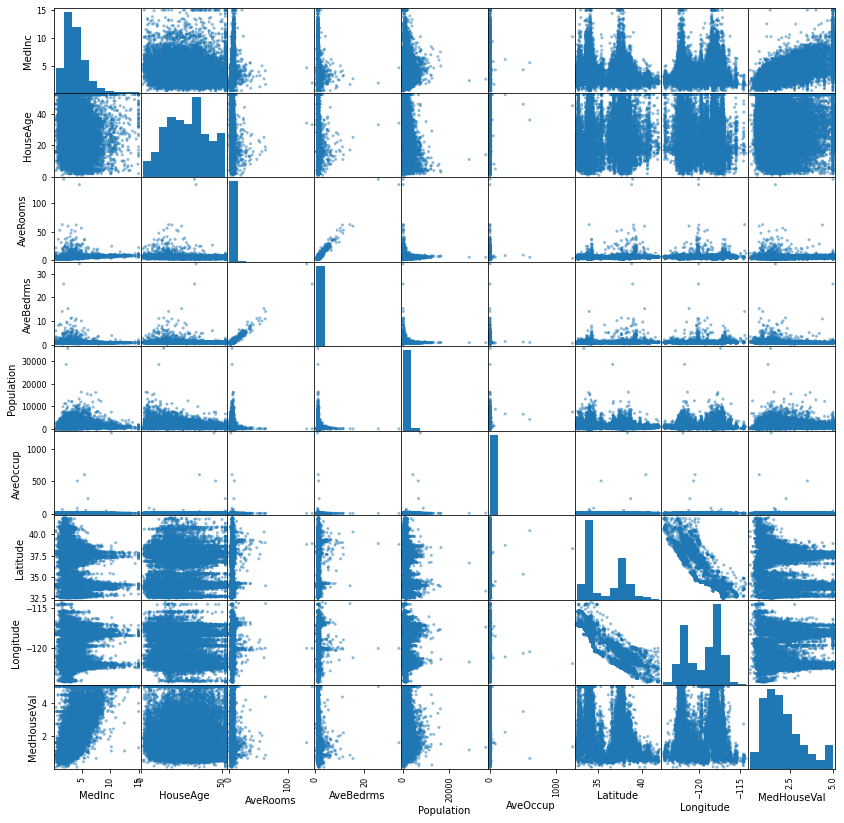

In [5]:
'''
Question 5 - Plot each pair of features.
'''
frames = pd.concat([features, targets], axis=1)
pd.plotting.scatter_matrix(frames, figsize=(14,14))

It looks like there's a linear/quadratic relationship between MedInc and MedHouseVal. Also, it seems like there's a  quartic relationship between MedHouseVal and Latitude and Longitude. The other features seem to have no relationship with MedHouseVal.

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

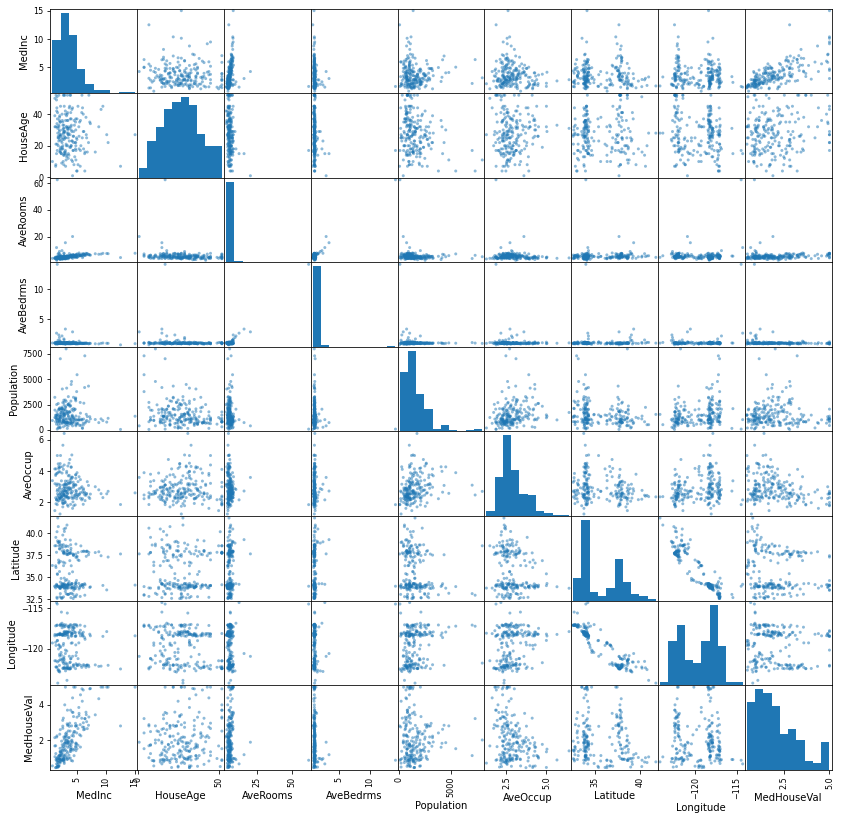

In [6]:
'''
Question 6 - Plot again using a sample() of 1%
'''
new_frames = frames.sample(frac=0.01)
pd.plotting.scatter_matrix(new_frames, figsize=(14,14))

There's no strong linear relationship between AveBedrms and MedHouseVal. The low value of $ R^2 $ found in experiment 4 corresponds to this plot, since the regression does not explain much of the variability. 

* Question 7 - Which features seem to have the strongest linear relationship with MedHouseVal?
<br>
     -The feature MedInc has the strongest linear relationship with MedHouseVal

* Question 8 - What relationship do you see between MedHouseVal and the Latitude and Longitude features?
<br>
    - It seems like there's a quartic relationship between MedHouseVal and the Latitude and Longitude features. When examing the map of California, it seems like the MedHouseVal varies greatly depending on locations, mostly near big cities (San Diego, LA, San Francisco, etc).

In [7]:
'''
Question 9 - Find the correlation matrix (covariance matrix with standardized variables)
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(frames)
new_frames = scaler.transform(frames)
new_frames = pd.DataFrame(frames)
new_frames.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Based on the correlation matrix found above, the feature MedInc is the strongest predictor of MedHouseVal because it has the largest value (0.688075) compared to other features. It matches the answer in experiment 7.

In [8]:
'''
Question 10 - Repeat experiement 4 using the feature MedInc as a predictor of MedHouseVal
'''
'''
------ Training set -------
'''
#Convert the data to np array
x_training_inc = np.array(x_training['MedInc'])[:,None]
y_training_inc = (y_training['MedHouseVal'])
reg  = LinearRegression().fit(x_training_inc, y_training_inc)

y_training_pred = reg.predict(x_training_inc)
MSE = mean_squared_error(y_training, y_training_pred)
print(f"The average loss for the training set is {MSE}")
'''
------ Test set -------
'''
#Convert the data to np array
x_test_inc = np.array(x_test['MedInc'])[:,None]
y_test_inc = np.array(y_test['MedHouseVal'])
y_test_pred = reg.predict(x_test_inc)
MSE = mean_squared_error(y_test, y_test_pred)
print(f"The average loss for the training set is {MSE}")
'''
------ Finding R^2 ------
'''
R_squared = reg.score(x_training_inc, y_training)
print(f"The R^2 value for the training set is {R_squared}")
R_squared = linear_regression.score(x_test_inc, y_test)
print(f"The R^2 value for the test set is {R_squared}")

The average loss for the training set is 0.7083924846855346
The average loss for the training set is 0.67220120164671
The R^2 value for the training set is 0.468045955604915
The R^2 value for the test set is -0.4718637118121247


The MSE values for this model performs better than the previous model where AveBedrms was used as the predictor. The $ R^2 $ value for the training set improves significantly from 0.0029 to 0.468. However, the $ R^2 $ value for the test set is doing worse than the previous model (decreasing from -0.001 to -0.472)

In [9]:
'''
Question 11 - Repeat experiment (10) using all 8 input features. How do the training and test MSEs for this model 
              compare to that experiment?
'''
reg  = LinearRegression().fit(x_training, y_training)
'''
----- Training set -----
'''
y_training_pred = reg.predict(x_training)
MSE = mean_squared_error(y_training, y_training_pred)
print(f"The average loss for the training set is {MSE}")
'''
----- Test set -----
'''
y_test_pred = reg.predict(x_test)
MSE = mean_squared_error(y_test, y_test_pred)
print(f"The average loss for the training set is {MSE}")
'''
------ Finding R^2 ------
'''
R_squared = reg.score(x_training, y_training)
print(f"The R^2 value for the training set is {R_squared}")
R_squared = reg.score(x_test, y_test)
print(f"The R^2 value for the test set is {R_squared}")

The average loss for the training set is 0.5296444457890023
The average loss for the training set is 0.504776723963131
The R^2 value for the training set is 0.6022734414610225
The R^2 value for the test set is 0.6207624626635024


Both the training and test MSE values for this model are lower than the previous model (experiment 10); however, the $ R^2 $ values for this model are higher than the previous model 

In [10]:
'''
Question 12 - Use the fit_transform() method to create degree-2 polynomial and interaction terms for the entire set
              of 8 features, then fit a new linear model.
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X = x_training
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
# print(X.shape) #(16512 rows, 45 columns)
poly_reg = LinearRegression().fit(X, y_training)
'''
----- Training MSE -----
'''
y_training_pred = poly_reg.predict(X)
training_MSE = mean_squared_error(y_training, y_training_pred)
print(f"The training MSE for this model is {training_MSE}")
'''
----- Test MSE -----
'''
X_test = x_test
X_test = poly.fit_transform(X_test)
# print(X_test.shape)
y_test_pred = poly_reg.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f"The test MSE for this model is {test_MSE}\n")
'''
----- Finding R^2 -----
'''
R_squared = poly_reg.score(X, y_training)
print(f"The R^2 value for the training set is {R_squared}")
R_squared = poly_reg.score(X_test, y_test)
print(f"The R^2 value for the test set is {R_squared}")

The training MSE for this model is 0.42433222517445207
The test MSE for this model is 0.6463803001631517

The R^2 value for the training set is 0.6813556774971741
The R^2 value for the test set is 0.5143760368106747


The training MSE for this model (\~0.424) is lower than the previous model (\~0.530) found in experiment 11; however, the test MSE for this model (\~0.646) is higher than the previous model (\~ 0.505). Adding polynomial terms leads to overfitting because the test MSE for this model is higher than the previous model (experiment 11)

In [11]:
'''
Question 13 - Regularization
'''
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

ridge = Ridge(alpha=1.0, normalize=True)
'''
----- Training set -----
'''
X = x_training
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
regularization = ridge.fit(X, y_training)
y_training_pred = regularization.predict(X)
training_MSE = mean_squared_error(y_training, y_training_pred)
print(f"The training MSE for this model is {training_MSE}")
'''
----- Test set -----
'''
X_test = x_test
X_test = poly.fit_transform(X_test)
y_test_pred = regularization.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f"The test MSE for this model is {test_MSE}")
'''
----- Finding R^2 -----
'''
R_squared = regularization.score(X, y_training)
print(f"The R^2 value for the training set is {R_squared}")
R_squared = regularization.score(X_test, y_test)
print(f"The R^2 value for the test set is {R_squared}")

The training MSE for this model is 0.6457457247916447
The test MSE for this model is 0.6190711914117146
The R^2 value for the training set is 0.5150893644697001
The R^2 value for the test set is 0.534893304462077


The training MSE value for this model (0.646) is higher than the previous model (0.424) due to regularization penalty. However, the test MSE for this model (0.620) is a little bit lower than the previous model (0.646). The model found in experiment 13 performs better because of low test MSE because we're only interested in the accuracy of the predictions that we obtain when we apply the method to unseen data.